In [192]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np

Global variables

In [193]:
COLORS = [ "#2c7bb6", "#d7191c", "#fdae61", "#fffAf6"]
TITLE = 'Confronto tra la posizione di partenza e la posizione di arrivo'
XTICKS = ['Arrivo', 'Partenza']

In [194]:
def convertData(driversData, drivers):
    columns = driversData.columns.tolist()
    no_dnf1 = driversData['POS D1'].dropna().values
    pos1 = [no_dnf1, driversData['ST D1']]

    no_dnf2 = driversData['POS D2'].dropna().values
    pos2 = [no_dnf2, driversData['ST D2']]

    maxstD1 = driversData['ST D1'].max()
    maxstD2 = driversData['ST D2'].max()
    maxposD1 = driversData['POS D1'].max()
    maxposD2 = driversData['POS D2'].max()
    ymax = max(maxposD1, maxposD2, maxstD1, maxstD2)

    if 'S ST D1' in columns:
        maxsstD1 = driversData['S ST D1'].max()
        maxsstD2 = driversData['S ST D2'].max()
        maxsprintD1 = driversData['SPRINT D1'].max()
        maxsprintD2 = driversData['SPRINT D2'].max()
        ymax = max(maxsstD1, maxsstD2, maxsprintD1, maxsprintD2, ymax)

    drawChart(pos1, drivers[0], ymax+1)
    drawChart(pos2, drivers[1], ymax+1)

    if 'POS D3' in columns:
        no_dnf3 = driversData['POS D3'].dropna().values
        pos3 = [no_dnf3, driversData['ST D3']]

        maxstD3 = driversData['ST D3'].max()
        maxposD3 = driversData['POS D3'].max()
        ymax = max(ymax, maxstD3, maxposD3)

        drawChart(pos3, drivers[2], ymax)

In [195]:
def drawChart(pos, driver, ymax):
    medianprops = dict(linewidth=2, color=COLORS[1])
    meanprops = dict(linestyle=(0, (4.4, 4.4)), linewidth=2, color=COLORS[0])
    capprops = dict(color = COLORS[2])

    fig, ax = plt.subplots(facecolor = COLORS[3])
    ax.boxplot(pos, meanline = True, showmeans = True, medianprops = medianprops, capprops = capprops, meanprops = meanprops)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    ax.set_xlabel(driver)
    ax.set_facecolor(COLORS[3])
    plt.ylim(0, ymax)
    plt.xticks([1, 2], XTICKS)
    plt.title(TITLE)

    plt.show()

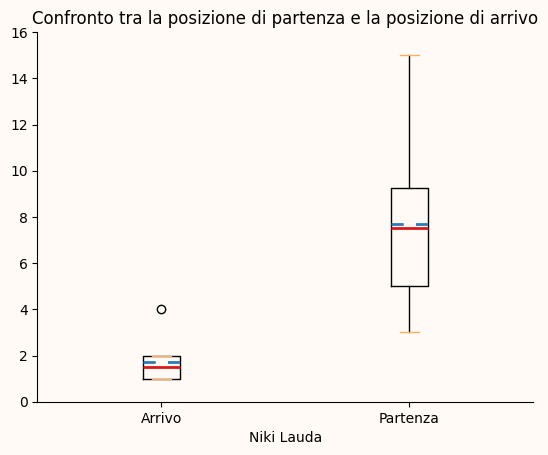

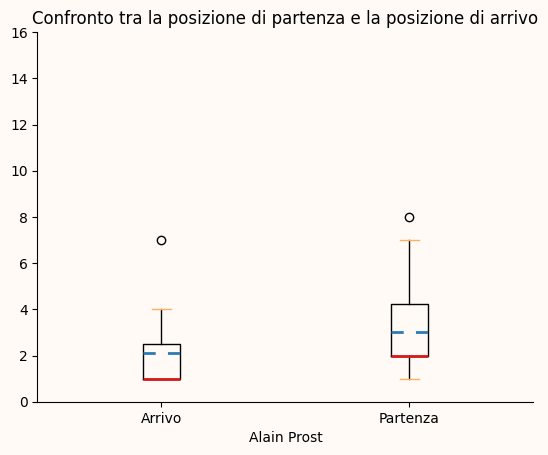

In [196]:
data = pd.read_csv('data/1984results.csv')
convertData(data, ["Niki Lauda", "Alain Prost"])

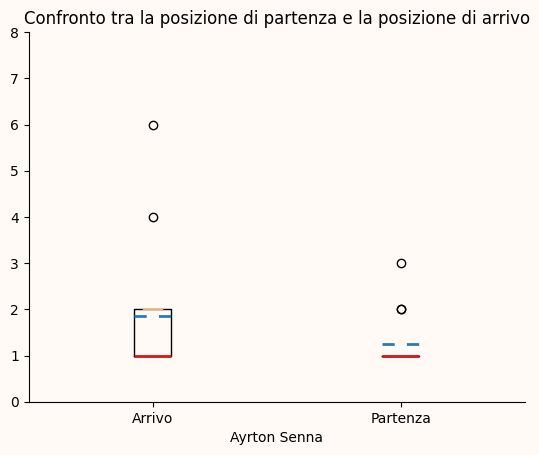

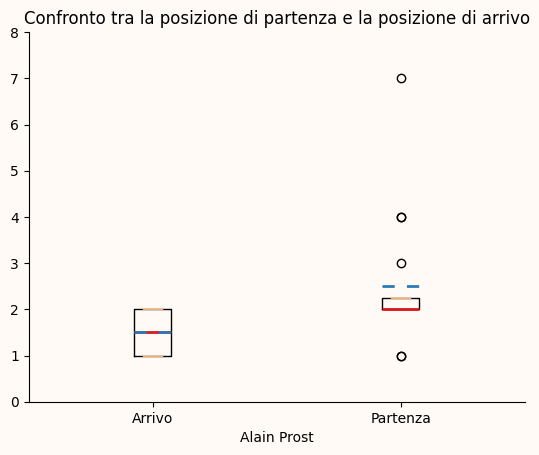

In [197]:
data = pd.read_csv('data/1988results.csv')
convertData(data, ["Ayrton Senna", "Alain Prost"]) 

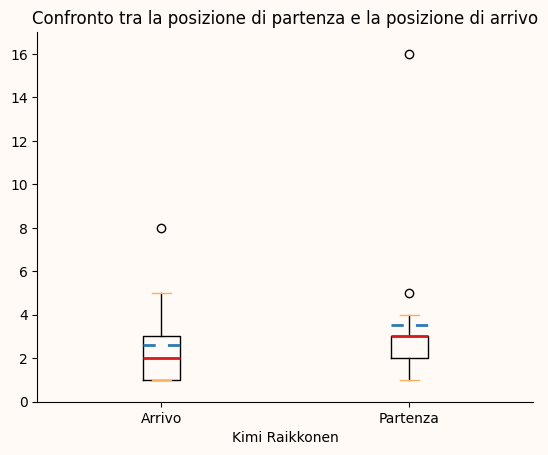

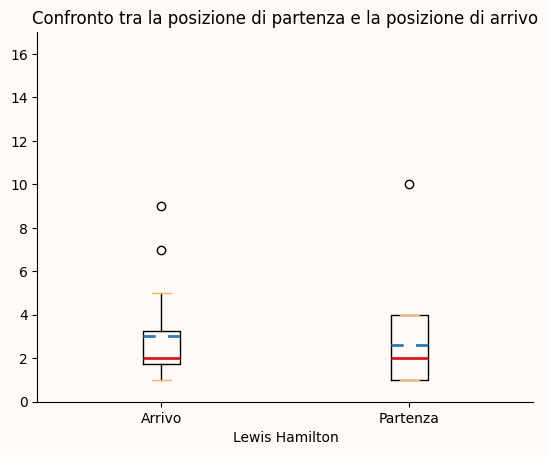

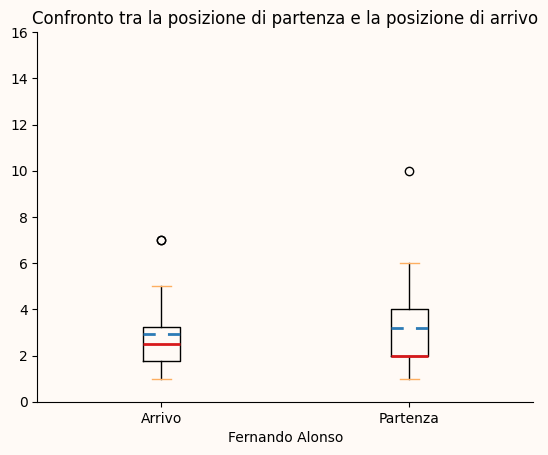

In [198]:
data = pd.read_csv('data/2007results.csv')
convertData(data, ["Kimi Raikkonen", "Lewis Hamilton", "Fernando Alonso"])

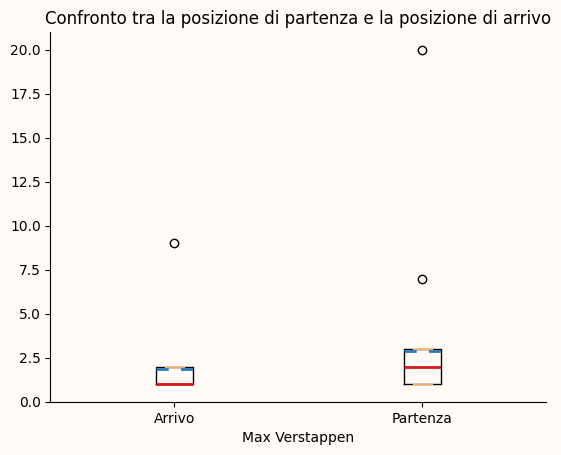

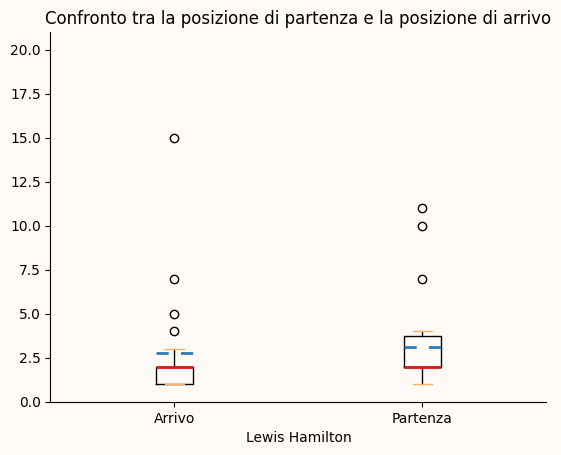

In [199]:
data = pd.read_csv('data/2021results.csv')
convertData(data, ["Max Verstappen", "Lewis Hamilton"])